In [1]:
import numpy as np
import pandas as pd
import time
from datetime import datetime
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
# import print_weights as pw
# call: pw.print_weights()

def print_weights(weights):
    # weights = model.get_weights();
    print('\n******* WEIGHTS OF ANN *******\n') 
    for i in range(int(len(weights)/2)):
        print('Weights W%d:\n' %(i), weights[i*2])
        print('Bias b%d:\n' %(i), weights[(i*2)+1])
#END print_weights()

#%% ANN TRAINING
print('\n')
print('**********************************************************')     
print('****  WELCOME TO NYC ELECTRIC SCOOTER SHARING SERVICE ****')
print('**********************************************************')

# prompt user to train or load an ANN model
option_list = ['1','2']
option = ''
while option not in option_list:  
    print('\nOPTIONS:')
    print('1 - Train a new ANN model')
    print('2 - Load an existing model')
    
    option = input('\nSelect an option by entering a number: \n')
    if option not in option_list:
        message = 'Invalid input: Input must be one of the following - '
        print(message, option_list)
        time.sleep(2)
        
if option == '1':
    ## OPTION 1: TRAIN A NEW ANN MODEL
    train_data_file = 'NYC_scooter_data.csv'
    
    print('\n********* NOW TRAINING ANN USING', train_data_file,'*********')
    time.sleep(3)
    
    ## load the training data
    df = pd.read_csv(train_data_file)
    
    ## the training data contains 6 columns:
    ##
    ##      timestamp - the date and time the sample was recorded
    ##      scooters_used - the number of new scooters used over the last hour
    ##      is_weekend - boolean that is 1 (true) if the day is a weekend
    ##      temp_c - the temperature in Celcius
    ##      wind_speed - wind speed in km/h
    ##      weather_code - category of weather: 3 = clear
    ##                                          4 = few clouds
    ##                                          5 = cloudy
    ##                                          6 = fog
    ##                                          7 = rain
    ##                                          8 = thunderstorm
    
    ## the timestamp column of df are stored as strings. We want to
    ## convert each timestamp string into a datetime objects using the 
    ## function datetime.strptime(). The first input of datetime.strptime() 
    ## is the string you want to convert, and the second input is the 
    ## format of the string, where
    ## %m = month, %d = day, %Y = year, %H = hour, %M = minute.
    ##
    ## create lambda function to perform conversion and return the hour.
    get_hour = lambda timestamp: datetime.strptime(timestamp, '%m/%d/%Y %H:%M').hour
    ## apply the lambda function to every timestamp in column df['timestamp']
    df['time_hour'] = df['timestamp'].apply(get_hour)
    ## define input matrix X (get rid of columns called timestamp and
    ## new_bikes_shared)
    X = np.array(df.drop(['timestamp', 'scooters_used'], axis=1))
    ## define expected output matrix Y
    Y = np.array(df['scooters_used'])
    
    ## create a model for the ANN
    model = keras.Sequential()

    ## add a hidden layer that accepts input features (time_hour,
    ## temperature_f, wind_speed, weather_code, is_weekend)
    ## Dense means every neuron in the layer connects to every neuron in the
    ## previous layer.
    model.add(keras.layers.Dense(4, activation='relu', input_shape=(5,)))
    ## add additional hidden layers (if any) here:
    model.add(keras.layers.Dense(3, activation='relu', input_shape=(4,)))
    ## add an output layer with a single output (new_bikes_shared)
    model.add(keras.layers.Dense(1, activation='linear'))

    ## set the optimization algorithm used for minimizing loss function
    ## use gradient descent (adam) to minimize error (loss)
    model.compile(optimizer='adam', loss='mean_squared_error')
    ## train the ANN model using 1000 iterations
    model.fit(X, Y, epochs=1000)



**********************************************************
****  WELCOME TO NYC ELECTRIC SCOOTER SHARING SERVICE ****
**********************************************************

OPTIONS:
1 - Train a new ANN model
2 - Load an existing model

Select an option by entering a number: 
1

********* NOW TRAINING ANN USING NYC_scooter_data.csv *********
Train on 240 samples
Epoch 1/1000
240/240 [==============================] - 0s 1ms/sample - loss: 518885.1583
Epoch 2/1000
240/240 [==============================] - 0s 41us/sample - loss: 515905.6875
Epoch 3/1000
240/240 [==============================] - 0s 43us/sample - loss: 512752.1667
Epoch 4/1000
240/240 [==============================] - 0s 62us/sample - loss: 509630.7458
Epoch 5/1000
240/240 [==============================] - 0s 57us/sample - loss: 506329.4833
Epoch 6/1000
240/240 [==============================] - 0s 65us/sample - loss: 502892.7667
Epoch 7/1000
240/240 [==============================] - 0s 57us/sample - loss: 49938

240/240 [==============================] - 0s 57us/sample - loss: 117356.4187
Epoch 86/1000
240/240 [==============================] - 0s 53us/sample - loss: 117206.0437
Epoch 87/1000
240/240 [==============================] - 0s 53us/sample - loss: 117103.3771
Epoch 88/1000
240/240 [==============================] - 0s 49us/sample - loss: 117015.4609
Epoch 89/1000
240/240 [==============================] - 0s 61us/sample - loss: 116897.5891
Epoch 90/1000
240/240 [==============================] - 0s 65us/sample - loss: 116857.0224
Epoch 91/1000
240/240 [==============================] - 0s 65us/sample - loss: 116785.4771
Epoch 92/1000
240/240 [==============================] - 0s 65us/sample - loss: 116733.9995
Epoch 93/1000
240/240 [==============================] - 0s 61us/sample - loss: 116705.2198
Epoch 94/1000
240/240 [==============================] - 0s 61us/sample - loss: 116640.3120
Epoch 95/1000
240/240 [==============================] - 0s 57us/sample - loss: 116598.8125
Ep

240/240 [==============================] - 0s 49us/sample - loss: 115944.6599
Epoch 174/1000
240/240 [==============================] - 0s 53us/sample - loss: 115936.9526
Epoch 175/1000
240/240 [==============================] - 0s 37us/sample - loss: 115942.8016
Epoch 176/1000
240/240 [==============================] - 0s 49us/sample - loss: 115917.3740
Epoch 177/1000
240/240 [==============================] - 0s 53us/sample - loss: 115914.4750
Epoch 178/1000
240/240 [==============================] - 0s 57us/sample - loss: 115904.7854
Epoch 179/1000
240/240 [==============================] - 0s 33us/sample - loss: 115908.6557
Epoch 180/1000
240/240 [==============================] - 0s 49us/sample - loss: 115896.4776
Epoch 181/1000
240/240 [==============================] - 0s 57us/sample - loss: 115906.3870
Epoch 182/1000
240/240 [==============================] - 0s 49us/sample - loss: 115872.2943
Epoch 183/1000
240/240 [==============================] - 0s 37us/sample - loss: 1158

240/240 [==============================] - 0s 41us/sample - loss: 115288.9214
Epoch 262/1000
240/240 [==============================] - 0s 53us/sample - loss: 115303.9240
Epoch 263/1000
240/240 [==============================] - 0s 57us/sample - loss: 115309.3802
Epoch 264/1000
240/240 [==============================] - 0s 53us/sample - loss: 115299.4104
Epoch 265/1000
240/240 [==============================] - 0s 53us/sample - loss: 115287.8427
Epoch 266/1000
240/240 [==============================] - 0s 37us/sample - loss: 115291.0427
Epoch 267/1000
240/240 [==============================] - 0s 53us/sample - loss: 115279.4646
Epoch 268/1000
240/240 [==============================] - 0s 57us/sample - loss: 115272.9651
Epoch 269/1000
240/240 [==============================] - 0s 45us/sample - loss: 115264.1656
Epoch 270/1000
240/240 [==============================] - 0s 40us/sample - loss: 115253.0094
Epoch 271/1000
240/240 [==============================] - 0s 53us/sample - loss: 1152

Epoch 349/1000
240/240 [==============================] - 0s 47us/sample - loss: 114717.4135
Epoch 350/1000
240/240 [==============================] - 0s 49us/sample - loss: 114701.6849
Epoch 351/1000
240/240 [==============================] - 0s 49us/sample - loss: 114711.0578
Epoch 352/1000
240/240 [==============================] - 0s 53us/sample - loss: 114698.9568
Epoch 353/1000
240/240 [==============================] - 0s 41us/sample - loss: 114695.1260
Epoch 354/1000
240/240 [==============================] - 0s 45us/sample - loss: 114692.7531
Epoch 355/1000
240/240 [==============================] - 0s 53us/sample - loss: 114659.5344
Epoch 356/1000
240/240 [==============================] - 0s 49us/sample - loss: 114654.3521
Epoch 357/1000
240/240 [==============================] - 0s 37us/sample - loss: 114654.6365
Epoch 358/1000
240/240 [==============================] - 0s 53us/sample - loss: 114656.4849
Epoch 359/1000
240/240 [==============================] - 0s 54us/samp

240/240 [==============================] - 0s 45us/sample - loss: 114238.9057
Epoch 437/1000
240/240 [==============================] - 0s 51us/sample - loss: 114199.5958
Epoch 438/1000
240/240 [==============================] - 0s 49us/sample - loss: 114241.6448
Epoch 439/1000
240/240 [==============================] - 0s 45us/sample - loss: 114250.8568
Epoch 440/1000
240/240 [==============================] - 0s 41us/sample - loss: 114174.1823
Epoch 441/1000
240/240 [==============================] - 0s 57us/sample - loss: 114185.3354
Epoch 442/1000
240/240 [==============================] - 0s 57us/sample - loss: 114175.6906
Epoch 443/1000
240/240 [==============================] - 0s 57us/sample - loss: 114184.1609
Epoch 444/1000
240/240 [==============================] - 0s 57us/sample - loss: 114164.1641
Epoch 445/1000
240/240 [==============================] - 0s 41us/sample - loss: 114160.3625
Epoch 446/1000
240/240 [==============================] - 0s 49us/sample - loss: 1141

240/240 [==============================] - 0s 49us/sample - loss: 113786.6812
Epoch 525/1000
240/240 [==============================] - 0s 49us/sample - loss: 113786.1875
Epoch 526/1000
240/240 [==============================] - 0s 49us/sample - loss: 113796.6609
Epoch 527/1000
240/240 [==============================] - 0s 45us/sample - loss: 113781.2688
Epoch 528/1000
240/240 [==============================] - 0s 49us/sample - loss: 113786.4109
Epoch 529/1000
240/240 [==============================] - 0s 53us/sample - loss: 113769.7745
Epoch 530/1000
240/240 [==============================] - 0s 53us/sample - loss: 113805.1687
Epoch 531/1000
240/240 [==============================] - 0s 37us/sample - loss: 113814.5698
Epoch 532/1000
240/240 [==============================] - 0s 49us/sample - loss: 113776.0849
Epoch 533/1000
240/240 [==============================] - 0s 53us/sample - loss: 113747.8490
Epoch 534/1000
240/240 [==============================] - 0s 49us/sample - loss: 1137

240/240 [==============================] - 0s 49us/sample - loss: 113483.1474
Epoch 612/1000
240/240 [==============================] - 0s 37us/sample - loss: 113481.7250
Epoch 613/1000
240/240 [==============================] - 0s 53us/sample - loss: 113462.0896
Epoch 614/1000
240/240 [==============================] - 0s 57us/sample - loss: 113482.8094
Epoch 615/1000
240/240 [==============================] - 0s 45us/sample - loss: 113508.7417
Epoch 616/1000
240/240 [==============================] - 0s 41us/sample - loss: 113460.0990
Epoch 617/1000
240/240 [==============================] - 0s 49us/sample - loss: 113453.8474
Epoch 618/1000
240/240 [==============================] - 0s 57us/sample - loss: 113449.0693
Epoch 619/1000
240/240 [==============================] - 0s 49us/sample - loss: 113459.6859
Epoch 620/1000
240/240 [==============================] - 0s 33us/sample - loss: 113454.6187
Epoch 621/1000
240/240 [==============================] - 0s 52us/sample - loss: 1134

240/240 [==============================] - 0s 53us/sample - loss: 113253.6156
Epoch 700/1000
240/240 [==============================] - 0s 53us/sample - loss: 113232.6346
Epoch 701/1000
240/240 [==============================] - 0s 57us/sample - loss: 113254.3240
Epoch 702/1000
240/240 [==============================] - 0s 37us/sample - loss: 113243.8667
Epoch 703/1000
240/240 [==============================] - 0s 45us/sample - loss: 113222.6062
Epoch 704/1000
240/240 [==============================] - 0s 53us/sample - loss: 113207.4896
Epoch 705/1000
240/240 [==============================] - 0s 53us/sample - loss: 113250.4870
Epoch 706/1000
240/240 [==============================] - 0s 37us/sample - loss: 113213.7396
Epoch 707/1000
240/240 [==============================] - 0s 49us/sample - loss: 113203.6823
Epoch 708/1000
240/240 [==============================] - 0s 57us/sample - loss: 113205.9427
Epoch 709/1000
240/240 [==============================] - 0s 57us/sample - loss: 1132

Epoch 787/1000
240/240 [==============================] - 0s 57us/sample - loss: 113110.8271
Epoch 788/1000
240/240 [==============================] - 0s 57us/sample - loss: 113063.1328
Epoch 789/1000
240/240 [==============================] - 0s 53us/sample - loss: 113042.5281
Epoch 790/1000
240/240 [==============================] - 0s 37us/sample - loss: 113032.6458
Epoch 791/1000
240/240 [==============================] - 0s 49us/sample - loss: 113025.6062
Epoch 792/1000
240/240 [==============================] - 0s 57us/sample - loss: 113018.5312
Epoch 793/1000
240/240 [==============================] - 0s 53us/sample - loss: 113019.4344
Epoch 794/1000
240/240 [==============================] - 0s 41us/sample - loss: 113047.0188
Epoch 795/1000
240/240 [==============================] - 0s 49us/sample - loss: 113089.6255
Epoch 796/1000
240/240 [==============================] - 0s 57us/sample - loss: 113016.4651
Epoch 797/1000
240/240 [==============================] - 0s 57us/samp

240/240 [==============================] - 0s 53us/sample - loss: 112892.4078
Epoch 876/1000
240/240 [==============================] - 0s 45us/sample - loss: 112945.8255
Epoch 877/1000
240/240 [==============================] - 0s 47us/sample - loss: 112901.8479
Epoch 878/1000
240/240 [==============================] - 0s 53us/sample - loss: 112914.4198
Epoch 879/1000
240/240 [==============================] - 0s 53us/sample - loss: 112910.5781
Epoch 880/1000
240/240 [==============================] - 0s 57us/sample - loss: 112885.3352
Epoch 881/1000
240/240 [==============================] - 0s 46us/sample - loss: 112862.4042
Epoch 882/1000
240/240 [==============================] - ETA: 0s - loss: 93201.406 - 0s 45us/sample - loss: 112895.0333
Epoch 883/1000
240/240 [==============================] - 0s 57us/sample - loss: 112869.3398
Epoch 884/1000
240/240 [==============================] - 0s 57us/sample - loss: 112868.0458
Epoch 885/1000
240/240 [==============================] -

Epoch 963/1000
240/240 [==============================] - 0s 41us/sample - loss: 112759.9042
Epoch 964/1000
240/240 [==============================] - 0s 49us/sample - loss: 112748.8208
Epoch 965/1000
240/240 [==============================] - 0s 53us/sample - loss: 112790.7344
Epoch 966/1000
240/240 [==============================] - 0s 36us/sample - loss: 112776.0698
Epoch 967/1000
240/240 [==============================] - 0s 57us/sample - loss: 112770.1625
Epoch 968/1000
240/240 [==============================] - 0s 53us/sample - loss: 112738.9281
Epoch 969/1000
240/240 [==============================] - 0s 57us/sample - loss: 112745.0167
Epoch 970/1000
240/240 [==============================] - 0s 49us/sample - loss: 112773.9552
Epoch 971/1000
240/240 [==============================] - 0s 37us/sample - loss: 112761.8385
Epoch 972/1000
240/240 [==============================] - 0s 53us/sample - loss: 112762.5260
Epoch 973/1000
240/240 [==============================] - 0s 57us/samp

Train on 240 samples
Epoch 1/100
240/240 [==============================] - 0s 1ms/sample - loss: 111654.9927
Epoch 2/100
240/240 [==============================] - 0s 41us/sample - loss: 115872.1083
Epoch 3/100
240/240 [==============================] - 0s 33us/sample - loss: 118494.5406
Epoch 4/100
240/240 [==============================] - 0s 61us/sample - loss: 115048.6333
Epoch 5/100
240/240 [==============================] - 0s 61us/sample - loss: 110875.0875
Epoch 6/100
240/240 [==============================] - 0s 61us/sample - loss: 112536.1792
Epoch 7/100
240/240 [==============================] - 0s 45us/sample - loss: 116382.2786
Epoch 8/100
240/240 [==============================] - 0s 57us/sample - loss: 115748.8948
Epoch 9/100
240/240 [==============================] - 0s 41us/sample - loss: 112478.9901
Epoch 10/100
240/240 [==============================] - 0s 57us/sample - loss: 113771.5521
Epoch 11/100
240/240 [==============================] - 0s 53us/sample - loss: 

240/240 [==============================] - 0s 49us/sample - loss: 115081.7510
Epoch 91/100
240/240 [==============================] - 0s 57us/sample - loss: 116373.3854
Epoch 92/100
240/240 [==============================] - 0s 61us/sample - loss: 113397.3260
Epoch 93/100
240/240 [==============================] - 0s 65us/sample - loss: 114680.9667
Epoch 94/100
240/240 [==============================] - 0s 53us/sample - loss: 115441.2328
Epoch 95/100
240/240 [==============================] - 0s 53us/sample - loss: 115579.2615
Epoch 96/100
240/240 [==============================] - 0s 49us/sample - loss: 113165.7474
Epoch 97/100
240/240 [==============================] - 0s 37us/sample - loss: 113952.2349
Epoch 98/100
240/240 [==============================] - 0s 49us/sample - loss: 111592.4094
Epoch 99/100
240/240 [==============================] - 0s 53us/sample - loss: 112339.3031
Epoch 100/100
240/240 [==============================] - 0s 232us/sample - loss: 112063.3302
Train on 2

240/240 [==============================] - 0s 77us/sample - loss: 111963.2281
Epoch 80/100
240/240 [==============================] - 0s 73us/sample - loss: 112378.8073
Epoch 81/100
240/240 [==============================] - 0s 65us/sample - loss: 112102.1156
Epoch 82/100
240/240 [==============================] - 0s 69us/sample - loss: 115168.4500
Epoch 83/100
240/240 [==============================] - 0s 85us/sample - loss: 112312.1385
Epoch 84/100
240/240 [==============================] - 0s 77us/sample - loss: 112793.1120
Epoch 85/100
240/240 [==============================] - 0s 85us/sample - loss: 113294.2693
Epoch 86/100
240/240 [==============================] - 0s 89us/sample - loss: 112003.0885
Epoch 87/100
240/240 [==============================] - 0s 73us/sample - loss: 113442.3354
Epoch 88/100
240/240 [==============================] - 0s 73us/sample - loss: 113216.0719
Epoch 89/100
240/240 [==============================] - 0s 77us/sample - loss: 112367.6875
Epoch 90/100

240/240 [==============================] - 0s 37us/sample - loss: 112860.0094
Epoch 69/100
240/240 [==============================] - 0s 37us/sample - loss: 116912.0042
Epoch 70/100
240/240 [==============================] - 0s 33us/sample - loss: 113833.5583
Epoch 71/100
240/240 [==============================] - 0s 33us/sample - loss: 116688.5344
Epoch 72/100
240/240 [==============================] - 0s 37us/sample - loss: 112338.6562
Epoch 73/100
240/240 [==============================] - 0s 49us/sample - loss: 114728.5604
Epoch 74/100
240/240 [==============================] - 0s 41us/sample - loss: 112733.3729
Epoch 75/100
240/240 [==============================] - 0s 41us/sample - loss: 117810.4958
Epoch 76/100
240/240 [==============================] - 0s 36us/sample - loss: 115641.2021
Epoch 77/100
240/240 [==============================] - 0s 39us/sample - loss: 116831.0625
Epoch 78/100
240/240 [==============================] - 0s 41us/sample - loss: 112844.2281
Epoch 79/100

240/240 [==============================] - 0s 33us/sample - loss: 111679.5068
Epoch 57/100
240/240 [==============================] - 0s 33us/sample - loss: 111617.3760
Epoch 58/100
240/240 [==============================] - 0s 32us/sample - loss: 111712.3151
Epoch 59/100
240/240 [==============================] - 0s 41us/sample - loss: 111687.3833
Epoch 60/100
240/240 [==============================] - 0s 33us/sample - loss: 111624.9870
Epoch 61/100
240/240 [==============================] - 0s 33us/sample - loss: 111597.7375
Epoch 62/100
240/240 [==============================] - 0s 33us/sample - loss: 111579.0557
Epoch 63/100
240/240 [==============================] - 0s 33us/sample - loss: 111614.1677
Epoch 64/100
240/240 [==============================] - 0s 37us/sample - loss: 111671.7646
Epoch 65/100
240/240 [==============================] - 0s 31us/sample - loss: 111691.5583
Epoch 66/100
240/240 [==============================] - 0s 31us/sample - loss: 111588.2917
Epoch 67/100

240/240 [==============================] - 0s 29us/sample - loss: 111689.5875
Epoch 46/100
240/240 [==============================] - 0s 28us/sample - loss: 111604.2896
Epoch 47/100
240/240 [==============================] - 0s 32us/sample - loss: 111611.1229
Epoch 48/100
240/240 [==============================] - 0s 28us/sample - loss: 111671.5234
Epoch 49/100
240/240 [==============================] - 0s 33us/sample - loss: 111659.7078
Epoch 50/100
240/240 [==============================] - 0s 37us/sample - loss: 111847.6365
Epoch 51/100
240/240 [==============================] - 0s 37us/sample - loss: 112169.6219
Epoch 52/100
240/240 [==============================] - 0s 37us/sample - loss: 111578.5354
Epoch 53/100
240/240 [==============================] - 0s 37us/sample - loss: 111706.7083
Epoch 54/100
240/240 [==============================] - 0s 37us/sample - loss: 111622.8479
Epoch 55/100
240/240 [==============================] - 0s 45us/sample - loss: 111626.5479
Epoch 56/100

240/240 [==============================] - 0s 32us/sample - loss: 111589.0229
Epoch 35/100
240/240 [==============================] - 0s 33us/sample - loss: 111581.9302
Epoch 36/100
240/240 [==============================] - 0s 32us/sample - loss: 111631.2510
Epoch 37/100
240/240 [==============================] - 0s 28us/sample - loss: 111544.4375
Epoch 38/100
240/240 [==============================] - 0s 28us/sample - loss: 111697.1068
Epoch 39/100
240/240 [==============================] - 0s 28us/sample - loss: 111780.1073
Epoch 40/100
240/240 [==============================] - 0s 32us/sample - loss: 112070.3682
Epoch 41/100
240/240 [==============================] - 0s 37us/sample - loss: 111692.5417
Epoch 42/100
240/240 [==============================] - 0s 37us/sample - loss: 111690.7672
Epoch 43/100
240/240 [==============================] - 0s 32us/sample - loss: 111700.2854
Epoch 44/100
240/240 [==============================] - 0s 33us/sample - loss: 111668.5885
Epoch 45/100

240/240 [==============================] - 0s 33us/sample - loss: 111553.5102
Epoch 23/100
240/240 [==============================] - 0s 28us/sample - loss: 111548.6240
Epoch 24/100
240/240 [==============================] - 0s 33us/sample - loss: 111553.5510
Epoch 25/100
240/240 [==============================] - 0s 28us/sample - loss: 111550.0849
Epoch 26/100
240/240 [==============================] - 0s 33us/sample - loss: 111581.0552
Epoch 27/100
240/240 [==============================] - 0s 33us/sample - loss: 111544.2375
Epoch 28/100
240/240 [==============================] - 0s 33us/sample - loss: 111570.8927
Epoch 29/100
240/240 [==============================] - 0s 33us/sample - loss: 111548.3417
Epoch 30/100
240/240 [==============================] - 0s 29us/sample - loss: 111570.3922
Epoch 31/100
240/240 [==============================] - 0s 33us/sample - loss: 111547.3958
Epoch 32/100
240/240 [==============================] - 0s 33us/sample - loss: 111587.6885
Epoch 33/100

240/240 [==============================] - 0s 102us/sample - loss: 111541.3510
Epoch 12/100
240/240 [==============================] - 0s 81us/sample - loss: 111556.0781
Epoch 13/100
240/240 [==============================] - 0s 81us/sample - loss: 111544.6495
Epoch 14/100
240/240 [==============================] - 0s 150us/sample - loss: 111545.6406
Epoch 15/100
240/240 [==============================] - 0s 116us/sample - loss: 111564.3990
Epoch 16/100
240/240 [==============================] - 0s 142us/sample - loss: 111541.9995
Epoch 17/100
240/240 [==============================] - 0s 89us/sample - loss: 111548.6198
Epoch 18/100
240/240 [==============================] - 0s 98us/sample - loss: 111563.1385
Epoch 19/100
240/240 [==============================] - 0s 73us/sample - loss: 111550.3510
Epoch 20/100
240/240 [==============================] - 0s 77us/sample - loss: 111556.9427
Epoch 21/100
240/240 [==============================] - 0s 65us/sample - loss: 111547.5219
Epoch 22

240/240 [==============================] - 0s 232us/sample - loss: 111543.9031
Train on 240 samples
Epoch 1/100
240/240 [==============================] - 0s 1ms/sample - loss: 111630.8474
Epoch 2/100
240/240 [==============================] - 0s 69us/sample - loss: 111554.4141
Epoch 3/100
240/240 [==============================] - 0s 65us/sample - loss: 111551.5813
Epoch 4/100
240/240 [==============================] - 0s 45us/sample - loss: 111561.0802
Epoch 5/100
240/240 [==============================] - 0s 53us/sample - loss: 111542.1656
Epoch 6/100
240/240 [==============================] - 0s 53us/sample - loss: 111560.2281
Epoch 7/100
240/240 [==============================] - 0s 57us/sample - loss: 111546.0646
Epoch 8/100
240/240 [==============================] - 0s 53us/sample - loss: 111545.6021
Epoch 9/100
240/240 [==============================] - 0s 45us/sample - loss: 111589.2818
Epoch 10/100
240/240 [==============================] - 0s 77us/sample - loss: 111549.3958


240/240 [==============================] - 0s 41us/sample - loss: 111545.5646
Epoch 90/100
240/240 [==============================] - 0s 65us/sample - loss: 111558.1594
Epoch 91/100
240/240 [==============================] - 0s 57us/sample - loss: 111593.9792
Epoch 92/100
240/240 [==============================] - 0s 57us/sample - loss: 111556.0661
Epoch 93/100
240/240 [==============================] - 0s 57us/sample - loss: 111552.0167
Epoch 94/100
240/240 [==============================] - 0s 53us/sample - loss: 111602.9464
Epoch 95/100
240/240 [==============================] - 0s 32us/sample - loss: 111548.2646
Epoch 96/100
240/240 [==============================] - 0s 53us/sample - loss: 111552.1411
Epoch 97/100
240/240 [==============================] - 0s 53us/sample - loss: 111544.2219
Epoch 98/100
240/240 [==============================] - 0s 49us/sample - loss: 111546.1031
Epoch 99/100
240/240 [==============================] - 0s 36us/sample - loss: 111553.0375
Epoch 100/10

240/240 [==============================] - 0s 37us/sample - loss: 111566.2375
Epoch 78/100
240/240 [==============================] - 0s 57us/sample - loss: 111560.4865
Epoch 79/100
240/240 [==============================] - 0s 53us/sample - loss: 111531.7625
Epoch 80/100
240/240 [==============================] - 0s 53us/sample - loss: 111585.9260
Epoch 81/100
240/240 [==============================] - 0s 41us/sample - loss: 111552.5552
Epoch 82/100
240/240 [==============================] - 0s 41us/sample - loss: 111560.3115
Epoch 83/100
240/240 [==============================] - 0s 57us/sample - loss: 111544.2073
Epoch 84/100
240/240 [==============================] - 0s 53us/sample - loss: 111568.6448
Epoch 85/100
240/240 [==============================] - 0s 53us/sample - loss: 111557.2917
Epoch 86/100
240/240 [==============================] - 0s 41us/sample - loss: 111537.1865
Epoch 87/100
240/240 [==============================] - 0s 53us/sample - loss: 111543.1792
Epoch 88/100

240/240 [==============================] - 0s 49us/sample - loss: 111545.7021
Epoch 66/100
240/240 [==============================] - 0s 53us/sample - loss: 111548.6380
Epoch 67/100
240/240 [==============================] - 0s 53us/sample - loss: 111552.4375
Epoch 68/100
240/240 [==============================] - 0s 49us/sample - loss: 111541.8917
Epoch 69/100
240/240 [==============================] - 0s 53us/sample - loss: 111570.7063
Epoch 70/100
240/240 [==============================] - 0s 53us/sample - loss: 111555.2260
Epoch 71/100
240/240 [==============================] - 0s 45us/sample - loss: 111558.6906
Epoch 72/100
240/240 [==============================] - 0s 45us/sample - loss: 111552.0885
Epoch 73/100
240/240 [==============================] - 0s 53us/sample - loss: 111544.6557
Epoch 74/100
240/240 [==============================] - 0s 57us/sample - loss: 111570.3510
Epoch 75/100
240/240 [==============================] - 0s 53us/sample - loss: 111556.2432
Epoch 76/100

240/240 [==============================] - 0s 57us/sample - loss: 111542.7437
Epoch 54/100
240/240 [==============================] - 0s 53us/sample - loss: 111553.2380
Epoch 55/100
240/240 [==============================] - 0s 49us/sample - loss: 111567.1646
Epoch 56/100
240/240 [==============================] - 0s 45us/sample - loss: 111551.6797
Epoch 57/100
240/240 [==============================] - 0s 53us/sample - loss: 111559.8049
Epoch 58/100
240/240 [==============================] - 0s 53us/sample - loss: 111542.8276
Epoch 59/100
240/240 [==============================] - 0s 53us/sample - loss: 111541.3792
Epoch 60/100
240/240 [==============================] - 0s 37us/sample - loss: 111539.5281
Epoch 61/100
240/240 [==============================] - 0s 53us/sample - loss: 111553.9141
Epoch 62/100
240/240 [==============================] - 0s 57us/sample - loss: 111545.1828
Epoch 63/100
240/240 [==============================] - 0s 53us/sample - loss: 111550.8609
Epoch 64/100

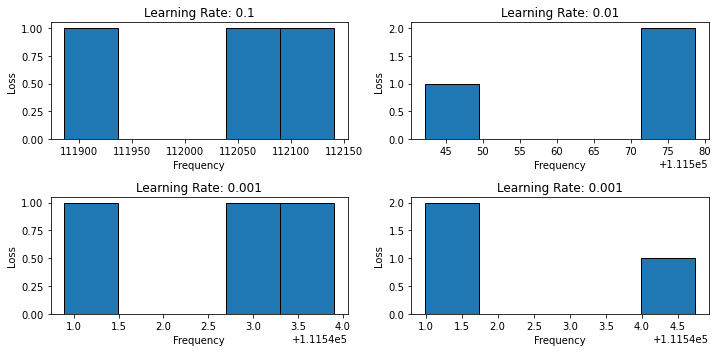

In [18]:
## record the loss
figure, ax = plt.subplots(2, 2, figsize=(10,5))
for (i, lnrate) in enumerate([0.1, 0.01, 0.001, 0.001]):
    loss = []
    for j in range(3):
        opt = keras.optimizers.Adam(learning_rate=lnrate)
        model.compile(optimizer=opt, loss='mean_squared_error')
        model.fit(X, Y, epochs=100)
        loss.append(model.evaluate(X, Y))
    print(loss)
    ax[i//2,i%2].hist(loss, bins=5, edgecolor='black')
    # display y label
    ax[i//2,i%2].set_ylabel("Loss")
    # display x label
    ax[i//2,i%2].set_xlabel("Frequency")
    # display title
    ax[i//2,i%2].set_title("Learning Rate: " + str(lnrate))

plt.tight_layout()
plt.savefig("histogram.png")
plt.show()